## Load the metrics and filter results

We start of with the L1, L2 experiments

In [ ]:
import pandas as pd

l1l2_metrics=pd.read_csv('evaluation_results_L1L2.csv')
l1l2_metrics

Change the eval_root strings into something more readable focusing on the L1 and L2 combinations

In [ ]:
import re

# Function to process the string
def process_string(string):
    # Find all occurrences of L1m, L1p, L1mask with their values
    matches = re.findall(r'(L1\w+)=([^_]+)', string)
    result = []
    for key, value in matches:
        # If the value is False, replace L1 with L2
        if value == 'False':
            result.append(key.replace('L1', 'L2'))
        else:
            result.append(key)
    return ' '.join(result)

# Apply the function to the column
l1l2_metrics['Eval_Root'] = l1l2_metrics['Eval_Root'].apply(process_string)

print(l1l2_metrics)

### Generate overviews of the L1 and L2 experiments

In [ ]:
l1l2_metrics_pivot = l1l2_metrics.pivot_table(
    index=["Category", "Metric"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Eval_Root"           # Turn 'Eval_Root' into columns
).sort_values(by='Metric').reset_index()

l1l2_metrics_pivot.to_csv('evaluation_l1l2_grid.csv', index=False)
l1l2_metrics_pivot

In [ ]:
# Select a metric
l1l2_metrics_select= l1l2_metrics_pivot[l1l2_metrics_pivot['Metric']=='avg MD']
l1l2_metrics_select

In [ ]:
# average values for each experiment
l1l2_metrics_pivot2 = l1l2_metrics.pivot_table(
    index=["Eval_Root"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Metric"           # Turn 'Eval_Root' into columns
).reset_index()
l1l2_metrics_pivot2

### Generate overviews of the FreeDrag versus DragDiffusion experiments

In [ ]:
import pandas as pd

freedrag_metrics=pd.read_csv('evaluation_results_freedrag.csv')

# Update the eval_root column based on the condition
freedrag_metrics['Eval_Root'] = freedrag_metrics['Eval_Root'].apply(lambda x: 'freedrag' if 'freedrag_diffusion' in x.lower() else 'dragdiffusion')

# average values for each experiment
freedrag_metrics_pivot = freedrag_metrics.pivot_table(
    index=["Eval_Root","Category"],  # Keep Category and Metric as indices
    values="Value",               # Use 'Value' as the data
    columns="Metric"           # Turn 'Eval_Root' into columns
).sort_values(by=["Category","Eval_Root"]).reset_index()
freedrag_metrics_pivot

### Retrieve dragged images compared to the originals

Processing category: human_full_body
{'Original': ['../drag_bench_data/human_full_body/SY_2023-09-15-1923-29/user_drag.png', '../drag_bench_data/human_full_body/SY_2023-09-15-1924-45/user_drag.png', '../drag_bench_data/human_full_body/SY_2023-09-15-1925-32/user_drag.png'], 'DragDiffusion': ['../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/human_full_body/SY_2023-09-15-1923-29/dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/human_full_body/SY_2023-09-15-1924-45/dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/human_full_body/SY_2023-09-15-1925-32/dragged_image.png'], 'FreeDrag': ['../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0/human_full_body/SY_2023-09-15-1923-29/dragged_image.png', '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0/human_full_body/SY_2023-09-15-1924-45/dragged_image.png', '

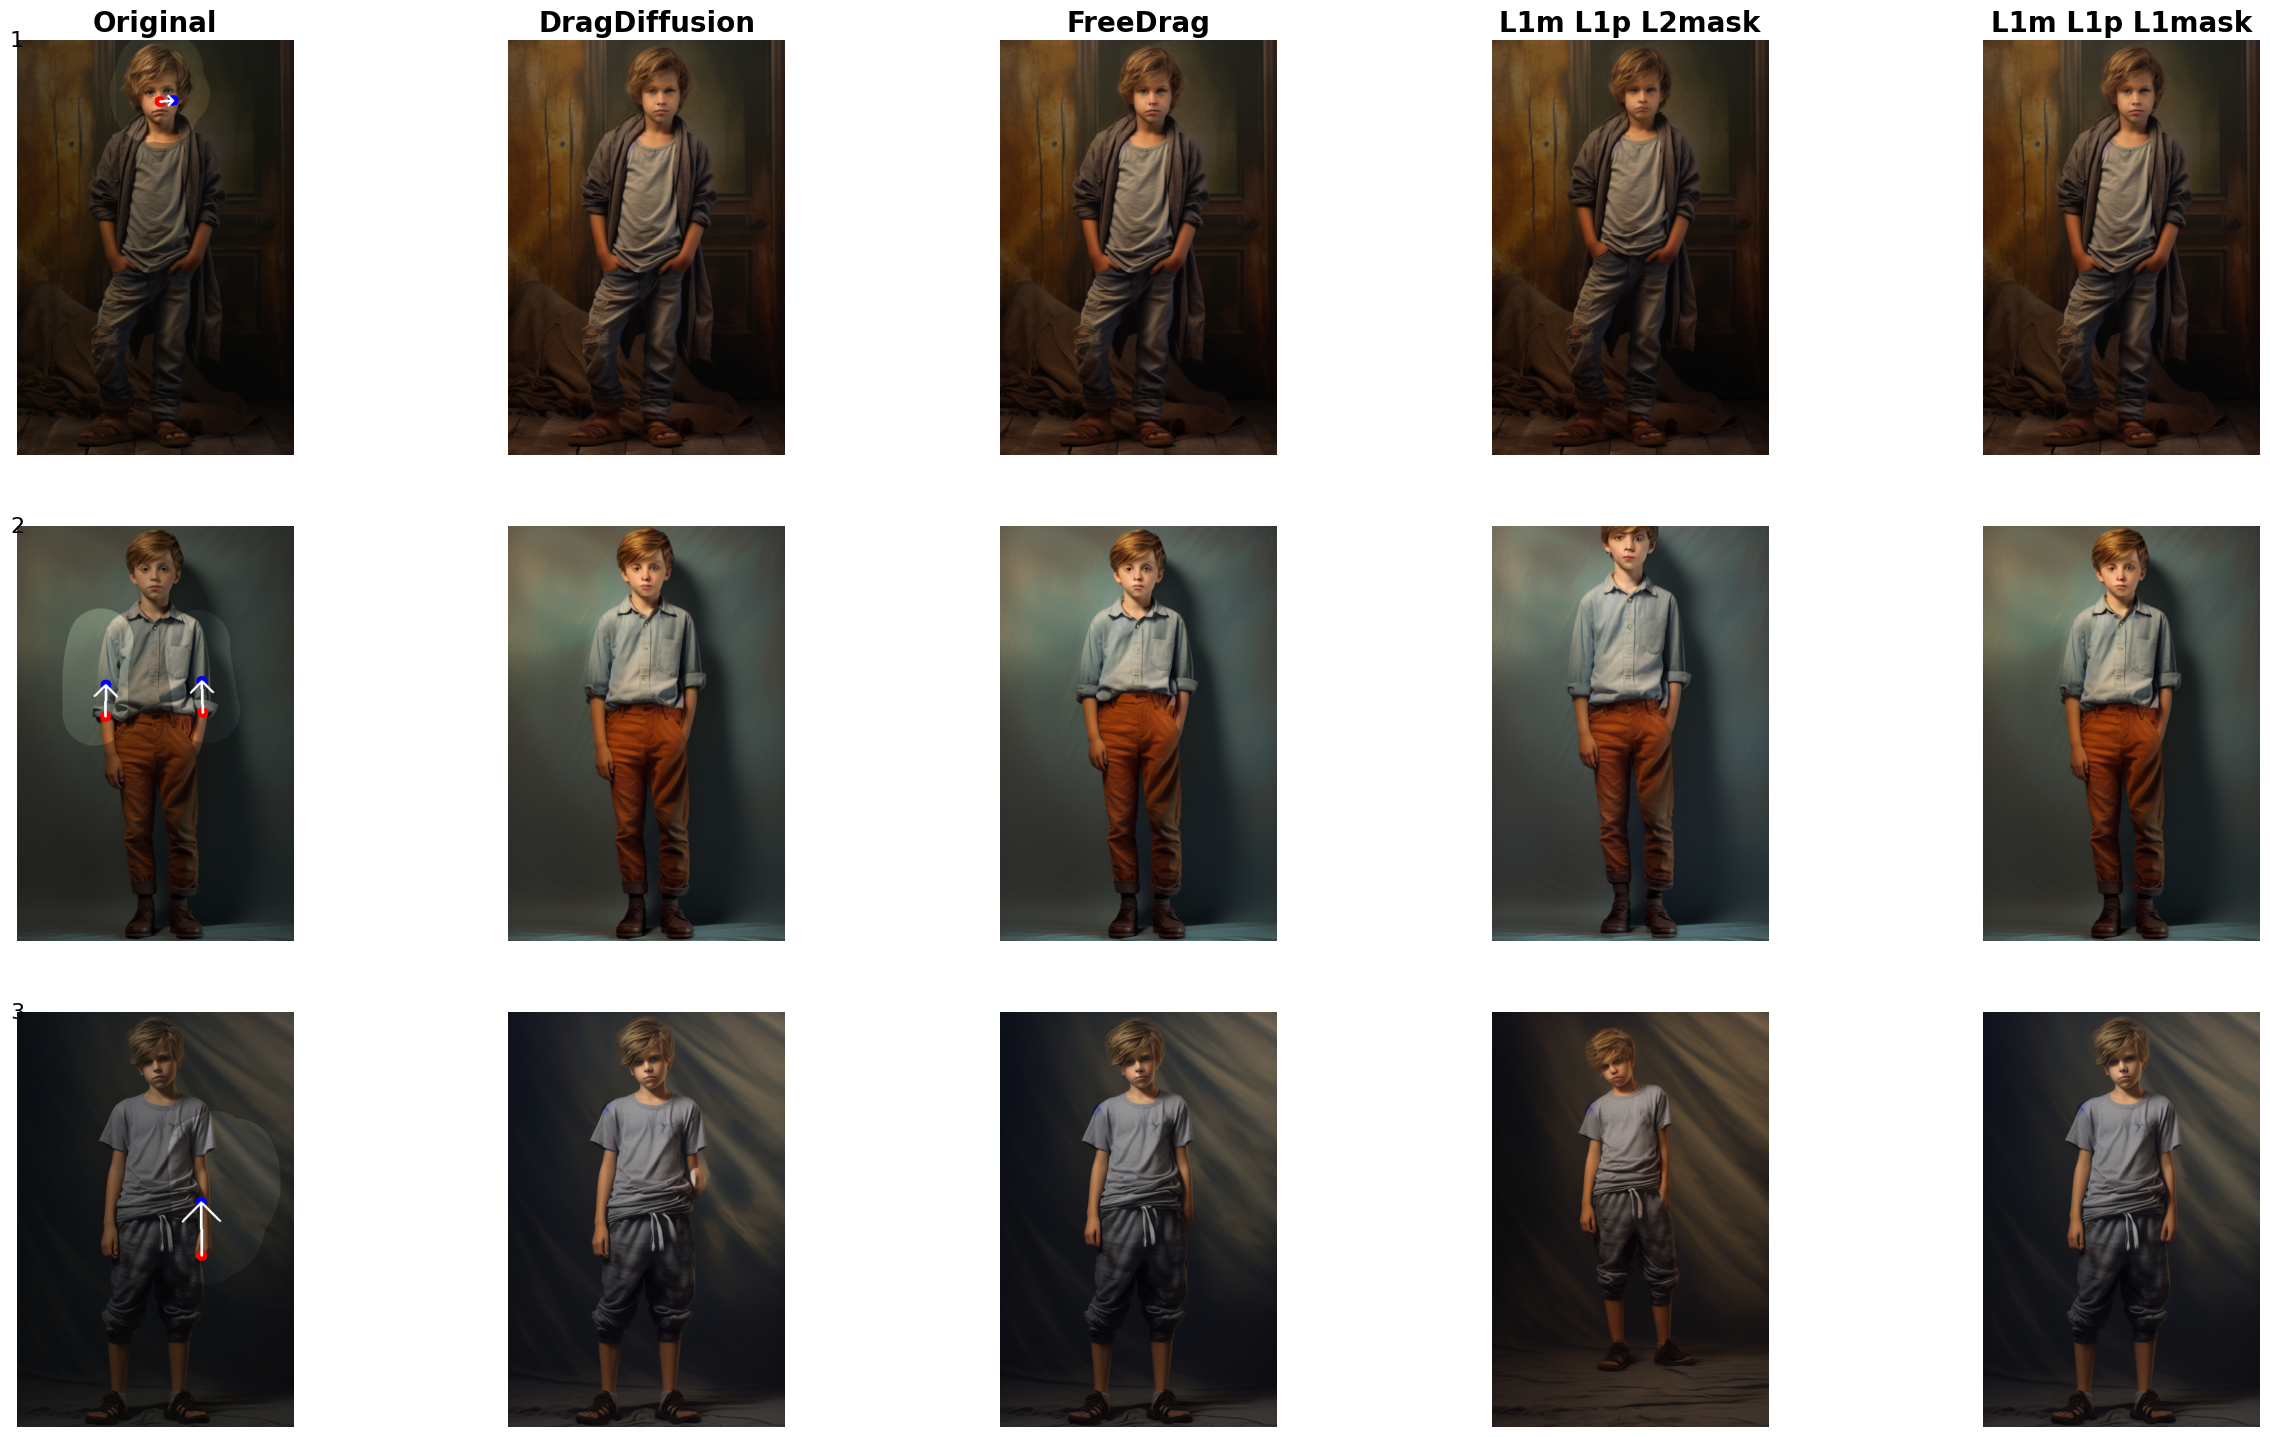

Processing category: interior_design
{'Original': ['../drag_bench_data/interior_design/SY_2023-09-15-1621-49/user_drag.png', '../drag_bench_data/interior_design/SY_2023-09-15-1627-31/user_drag.png', '../drag_bench_data/interior_design/SY_2023-09-15-1629-37/user_drag.png'], 'DragDiffusion': ['../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/interior_design/SY_2023-09-15-1621-49/dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/interior_design/SY_2023-09-15-1627-31/dragged_image.png', '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300/interior_design/SY_2023-09-15-1629-37/dragged_image.png'], 'FreeDrag': ['../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0/interior_design/SY_2023-09-15-1621-49/dragged_image.png', '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0/interior_design/SY_2023-09-15-1627-31/dragged_image.png', '

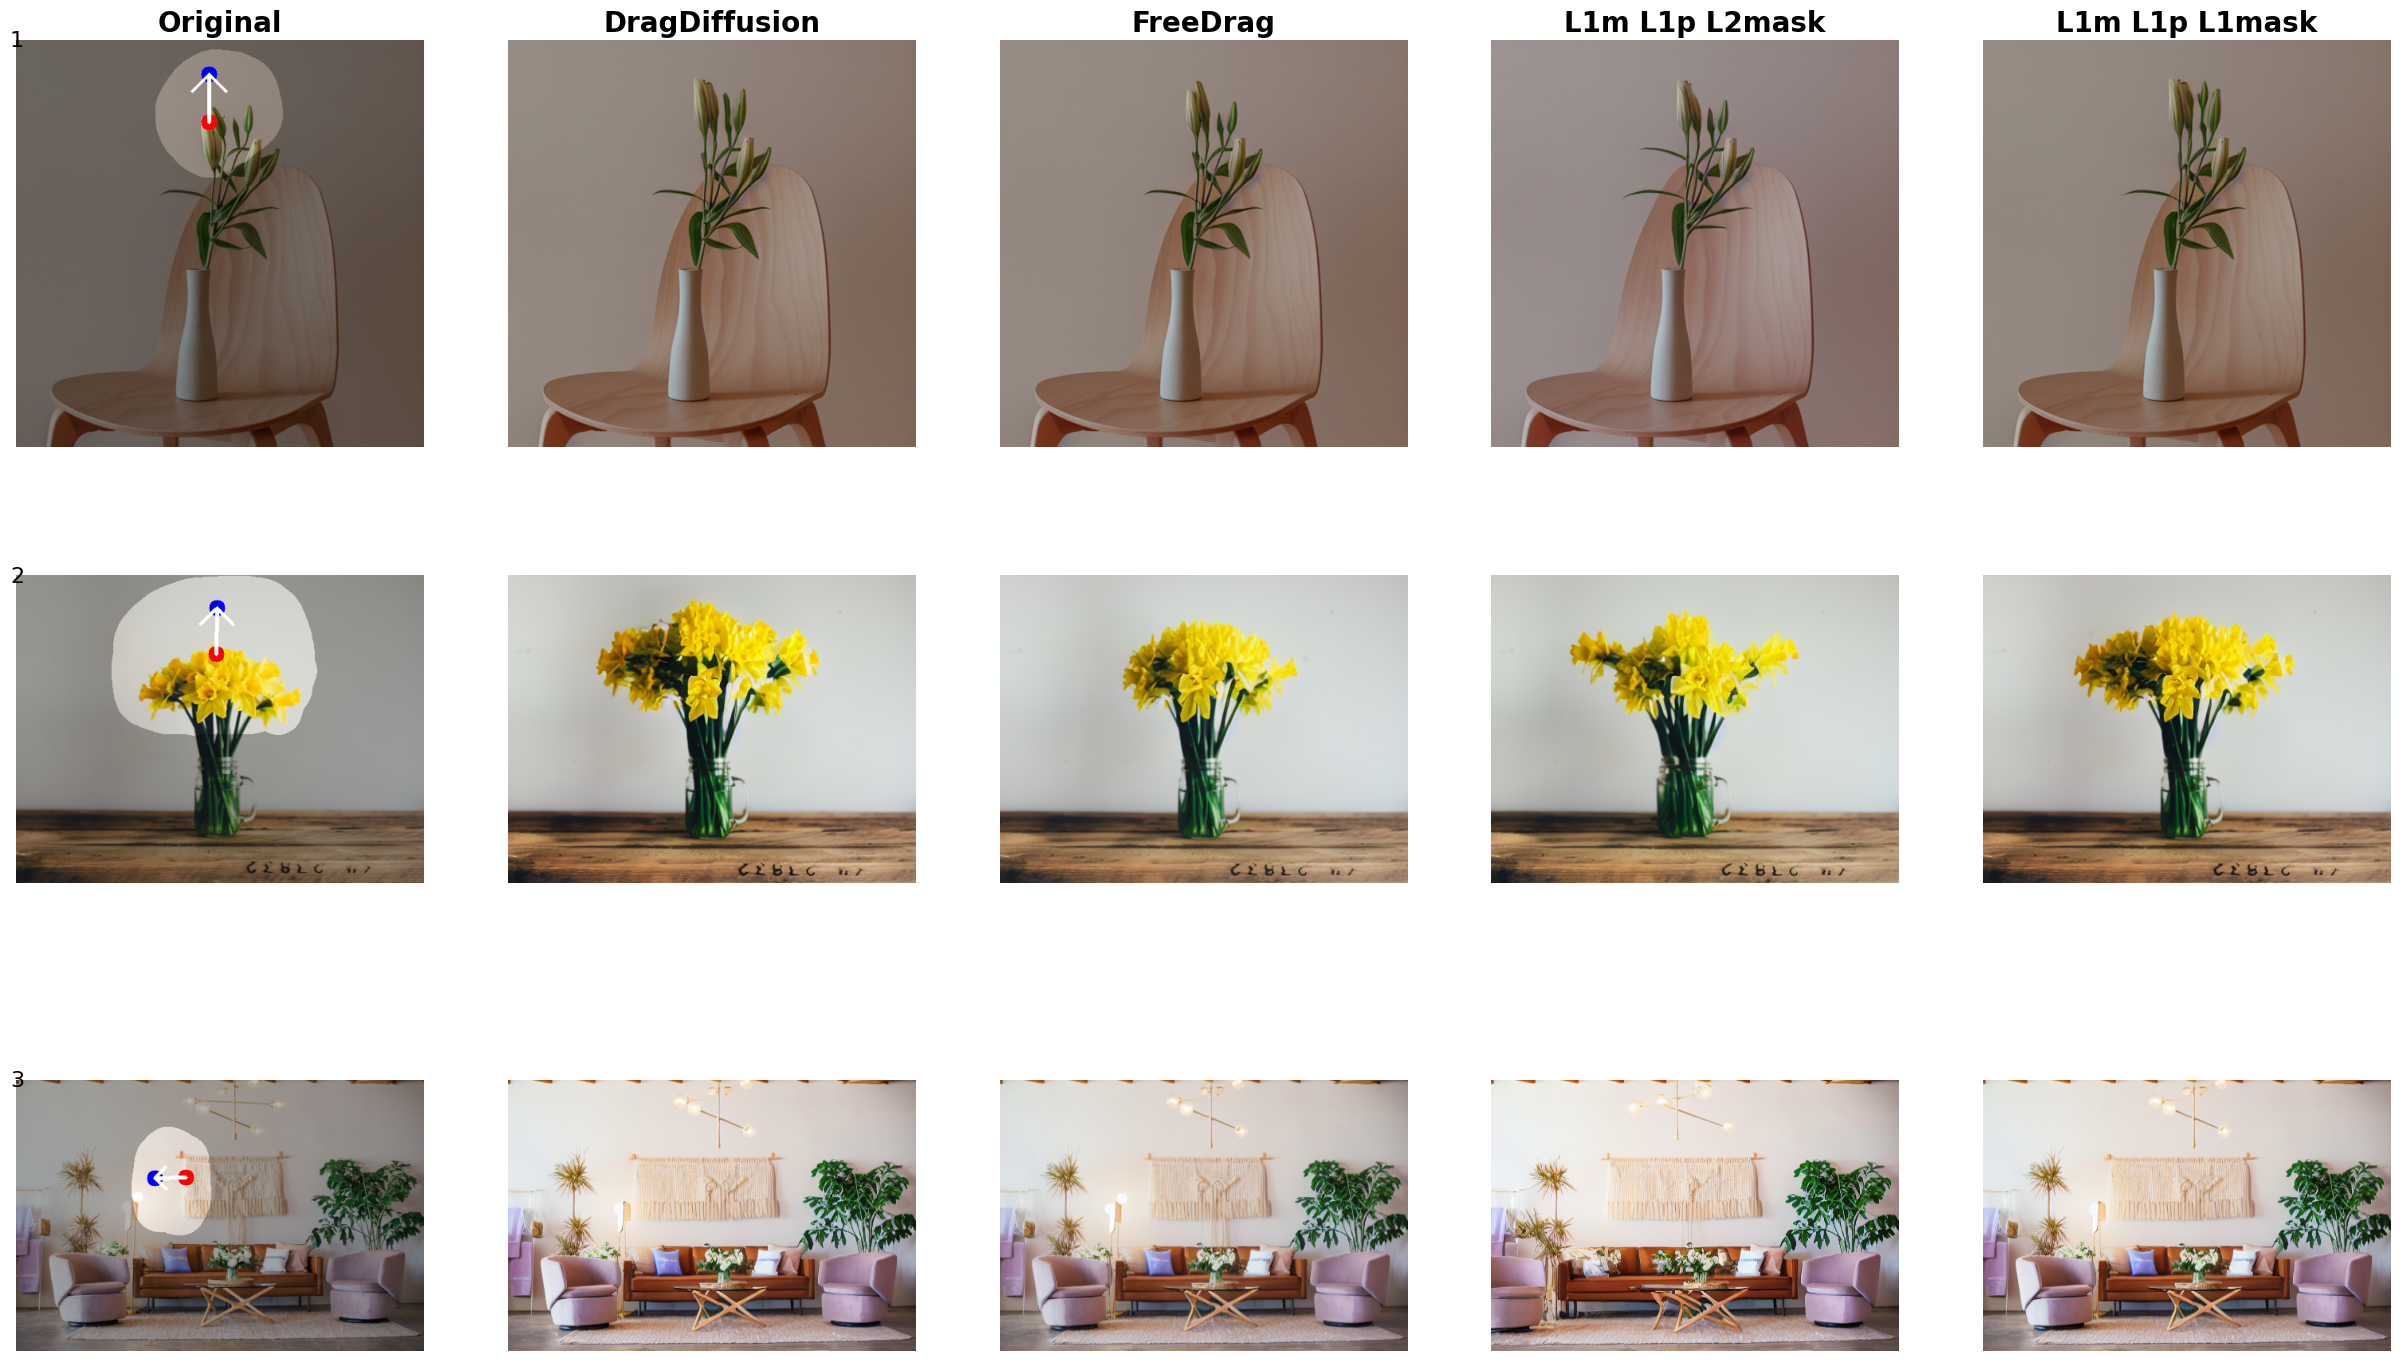

In [1]:
import showImages
import os

# Select which root folder paths to include
root_folders = [
    '../drag_bench_data',
    '../FreeDrag_experiments/drag_diffusion_res_80_0.7_0.01_3_n_step=300',
    '../FreeDrag_experiments/freedrag_diffusion_res_80_0.7_0.01_3_n_step=300_d_max=5.0_l_expected=1.0',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=True',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=True',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=False',
    #'../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=True',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=True'
]

# Directory to save the result images
output_dir = "img"
os.makedirs(output_dir, exist_ok=True)

# Select the categories to include
all_categories = [
   # 'art_work',
   # 'land_scape',
   # 'building_city_view',
   # 'building_countryside_view',
   # 'animals',
   # 'human_head',
   # 'human_upper_body',
    'human_full_body',
    'interior_design',
   # 'other_objects',
]

#  Select which rows of images to include in the output as a list for example imageList=[1,5,7] 
#  Or use imageList=None to retrieve all
imageList=[1,2,3]

for category in all_categories:
    print(f"Processing category: {category}")

    # Load images for the current category
    images_dict = showImages.load_images_from_roots(root_folders, category, imageList)
    print(images_dict)

    # Save the grid as a jpg file
    save_path = os.path.join(output_dir, f"{category}.png")
    showImages.display_images_in_grid(images_dict, save_path=save_path)